In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import itertools
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
%matplotlib inline

# Understanding Dataset

In [2]:
data = pd.read_csv('/content/creditcard.csv')
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:

df=pd.DataFrame(data)

In [4]:
df.shape

(142978, 31)

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142978 entries, 0 to 142977
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    142978 non-null  int64  
 1   V1      142978 non-null  float64
 2   V2      142978 non-null  float64
 3   V3      142978 non-null  float64
 4   V4      142978 non-null  float64
 5   V5      142978 non-null  float64
 6   V6      142978 non-null  float64
 7   V7      142978 non-null  float64
 8   V8      142978 non-null  float64
 9   V9      142978 non-null  float64
 10  V10     142978 non-null  float64
 11  V11     142978 non-null  float64
 12  V12     142978 non-null  float64
 13  V13     142978 non-null  float64
 14  V14     142978 non-null  float64
 15  V15     142978 non-null  float64
 16  V16     142978 non-null  float64
 17  V17     142977 non-null  float64
 18  V18     142977 non-null  float64
 19  V19     142977 non-null  float64
 20  V20     142977 non-null  float64
 21  V21     14

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,142978.000000,142978.000000,142978.000000,142978.000000,142978.000000,142978.000000,142978.000000,142978.000000,142978.000000,142978.000000,142978.000000,142978.000000,142978.000000,142978.000000,142978.000000,142978.000000,142978.000000,142977.000000,142977.000000,142977.000000,142977.000000,142977.000000,142977.000000,142977.000000,142977.000000,142977.000000,142977.000000,142977.000000,142977.000000,142977.000000,142977.000000
mean,52533.513142,-0.250461,0.022187,0.673456,0.137181,-0.282616,0.077837,-0.118457,0.065276,-0.089071,-0.022791,0.208067,0.031631,-0.018749,0.028281,0.229436,-0.008339,0.041817,-0.083690,-0.017225,0.042490,-0.039906,-0.118037,-0.033090,0.011453,0.130777,0.021496,0.000613,0.002205,90.584179,0.001895
std,21162.094513,1.815168,1.611598,1.266503,1.322129,1.306014,1.282596,1.165491,1.233379,1.090147,1.053567,1.048189,1.018297,0.997552,0.917980,0.925473,0.877300,0.884910,0.832114,0.808514,0.719163,0.720393,0.634584,0.589240,0.595556,0.437347,0.492381,0.389119,0.306168,246.163769,0.043495
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,-18.271168,-4.049895,-17.769143,-5.791881,-19.214325,-4.152532,-13.563273,-25.162799,-9.498746,-7.213527,-21.024817,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,38242.000000,-1.021761,-0.559134,0.171456,-0.718050,-0.903583,-0.662170,-0.604786,-0.130439,-0.712950,-0.495934,-0.550004,-0.369989,-0.673499,-0.343690,-0.306861,-0.474851,-0.412051,-0.548630,-0.505701,-0.169648,-0.225867,-0.547571,-0.171812,-0.325573,-0.136193,-0.327223,-0.060140,-0.004216,5.990000,0.000000
50%,54317.000000,-0.273162,0.107138,0.750710,0.164464,-0.314868,-0.177968,-0.064507,0.081128,-0.153403,-0.100589,0.120944,0.169290,-0.020170,0.059176,0.340382,0.069851,-0.023896,-0.082989,-0.017192,-0.026684,-0.059620,-0.094317,-0.045099,0.068440,0.167316,-0.066379,0.012102,0.023621,23.490000,0.000000
75%,70348.750000,1.158422,0.779026,1.363557,0.991223,0.236790,0.462569,0.408973,0.375707,0.486965,0.418306,1.028718,0.654512,0.641699,0.452402,0.897415,0.531350,0.427537,0.388188,0.479250,0.164369,0.113041,0.300411,0.083172,0.408276,0.420105,0.284337,0.087798,0.077019,80.000000,0.000000
max,85051.000000,1.960497,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,23.745136,12.018913,7.848392,4.465413,10.526766,5.784514,6.098529,9.253526,5.041069,5.228342,39.420904,27.202839,10.503090,19.002942,4.022866,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


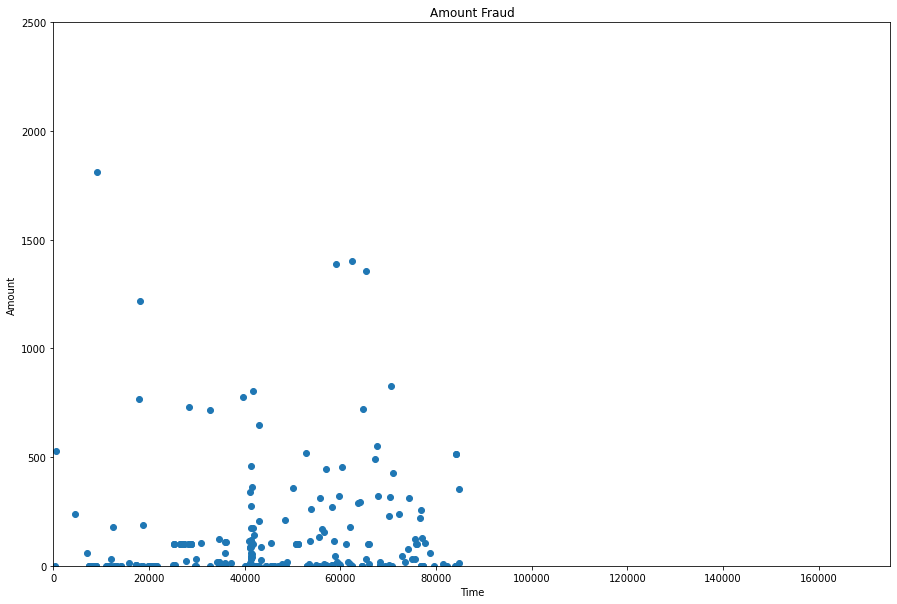

In [8]:
df_fraud = df[df['Class'] == 1]            # Recovery of Fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])  # Display the fraud amounts according to their time
plt.title('Amount Fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()


Observation:
We notice, time doesn't impact the frequency of frauds.
Moreover, the majority of frauds are small amounts

In [9]:
big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')

There are only 5 frauds where the amount was bigger than 1000 over 271 frauds


# Unbalanced Data

In [10]:

fraud = len(data[data.Class==1])
no_fraud = len(data[data.Class ==0])
print('There are only '+ str(fraud) + ' frauds in the original dataset, even though there are ' + str(no_fraud) +' no frauds in the dataset.')

There are only 271 frauds in the original dataset, even though there are 142706 no frauds in the dataset.


. This data is unbalanced which means using the data as it is might result in unwanted behaviour from a supervised classifier.
. To make it easy to understand if a classifier were to train with this data set trying to achieve the best accuracy possible it would most likely label every transaction as a non-fraud.

In [11]:
print("The accuracy of the classifier then would be : "+ str((284315-492)/284315)+ " which is the number of good classification over the number of tuple to classify")

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


To answer this problem we could use the oversampling principle or the undersampling principle
The undersampling principle should be used only if we can be sure that the selected few tuples (in this case non-fraud) are representative of the whole non-fraud transactions of the dataset.

# Correlation Features

In [12]:
df_corr = df.corr() # Calculation of the correlation coefficients in pairs, with the default method:
                    # Pearson, Standard Correlation Coefficient

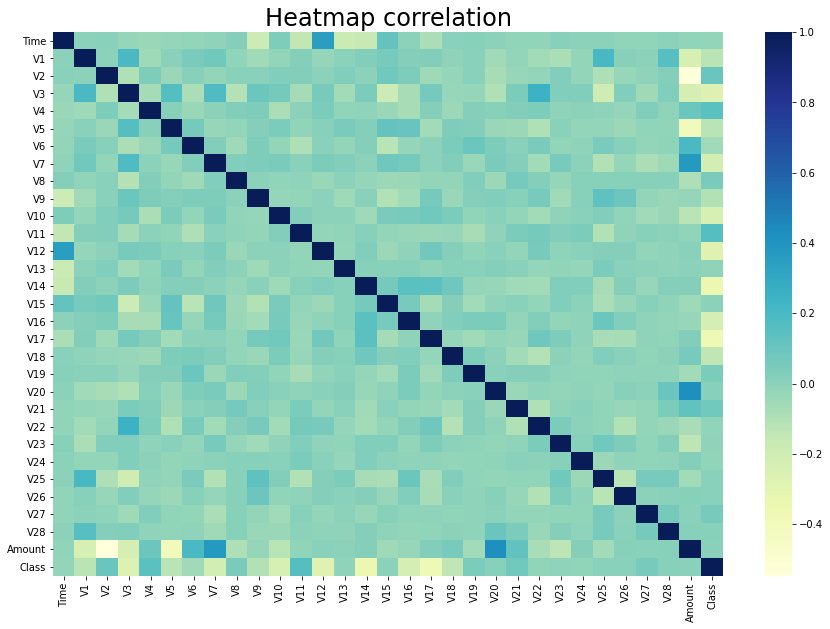

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

As we can notice, most of the features are not correlated with each other. This corroborates the fact that a PCA was previously performed on the data.

What can generally be done on a massive dataset is a dimension reduction. By picking th emost important dimensions, there is a possiblity of explaining most of the problem, thus gaining a considerable amount of time while preventing the accuracy to drop too much.

However in this case given the fact that a PCA was previously performed, if the dimension reduction is effective then the PCA wasn't computed in the most effective way. Another way to put it is that no dimension reduction should be computed on a dataset on which a PCA was computed correctly.

In [14]:
rank = df_corr['Class'] # Retrieving the correlation coefficients per feature in relation to the feature class
df_rank = pd.DataFrame(rank) 
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) # Ranking the absolute values of the coefficients
                                                                  # in descending order
df_rank.dropna(inplace=True) # Removing Missing Data (not a number)

# Data Selection (Oversampling)

One way to do oversampling is to replicate the under-presented class tuples until we attain a correct proportion between the class.

However as we haven't infinite time nor the patience, we are going to run the classifier with the undersampled training data(for those using the undersampling principle if results are really bad just rerun the training dataset definition)

In [15]:
# We seperate ours data in two groups : a train dataset and a test dataset

# First we build our train dataset
df_train_all = df[0:150000] # We cut in two the original dataset
df_train_1 = df_train_all[df_train_all['Class'] == 1] # We seperate the data which are the frauds and the no frauds
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have ' + str(len(df_train_1)) +" frauds so we need to take a similar number of non-fraud")

df_sample=df_train_0.sample(300)
df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds. 
df_train = df_train.sample(frac=1) # Then we mix our dataset

In this dataset, we have 271 frauds so we need to take a similar number of non-fraud


In [16]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = df_train['Class'] # We create our label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [17]:
############################## with all the test dataset to see if the model learn correctly ##################
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [18]:

X_train_rank = df_train[df_rank.index[1:11]] # We take the first ten ranked features
X_train_rank = np.asarray(X_train_rank)


Then we define training and testing set after applying a dimension reduction to illustrate the fact that nothing will be gained because a PCA was previously computed

In [19]:
X_train_rank = df_train[df_rank.index[1:11]] # We take the first ten ranked features
X_train_rank = np.asarray(X_train_rank)

In [20]:

############################## with all the test dataset to see if the model learn correctly ##################
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

# Confusion Matrix

In [21]:
class_names=np.array(['0','1']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)

In [22]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Model Selection

In [23]:
classifier = svm.SVC(kernel='linear') # We set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)

In [24]:

classifier.fit(X_train, y_train) # Then we train our model, with our balanced data train.

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Testing the Model

In [25]:
prediction_SVM_all = classifier.predict(X_test_all) #And finally, we predict our data test.

ValueError: ignored

In [ ]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)


In this case we are gonna try to minimize the number of errors in our prediction results. Errors are on the anti-diagonal of the confusion matrix. But we can infer that being wrong about an actual fraud is far worse than being wrong about a non-fraud transaction.


That is why using the accuracy as only classification criterion could be considered unthoughtful. During the remaining part of this study our criterion will consider precision on the real fraud 4 times more important than the general accuracy. Even though the final tested result is accuracy.

In [ ]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))